## x_train 과 y_train 만들기

y_train = 120*x_train - 600으로 설정해둠

그리고 정규분포에 근사하여 오차를 둠

In [1]:
import torch

a,b = 120, -600
x_train = torch.rand(300,1)*10
y_train = x_train*a+b  + (torch.randn(300,1)*120)

## x_train과 y_train 가지고 점 찍어보기

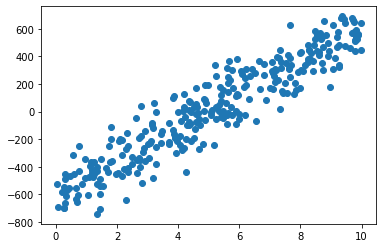

In [2]:
from matplotlib import pyplot as plt

plt.scatter(x_train, y_train)

## w와 b값 만들기, 그리고 learning rate 설정하기

In [3]:
w = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 0.01


In [4]:
!mkdir fig

mkdir: cannot create directory ‘fig’: File exists


In [5]:
import copy
from tqdm.notebook import tqdm

W_arr = []
b_arr = []
for epoch in tqdm(range(500)):
    w.requires_grad_(True)
    b.requires_grad_(True)
    hypothesis = torch.mm(x_train, w) + b
    cost = torch.mean((hypothesis-y_train)**2)
    cost.backward()
    with torch.no_grad():
        w = w-lr*w.grad
        b = b-lr*b.grad

    if epoch % 5 == 0 or epoch < 10:
        a = w
        b = b
        plt.plot([0,10],[-600, 600], color='b',linewidth=5, label = "GT")
        plt.plot([0,10],[b, 10*a+b], color='r',linewidth=3, label = "Predict")
        plt.legend()
        plt.scatter(x_train[:600], y_train[:600])        
        plt.savefig(f'fig/{str(epoch).zfill(3)}.png', dpi=300)
        plt.close()


## 내가 그린 plot들을 gif 로 만들기

In [6]:
import os
os.system('convert -delay 15 -loop 0  ./fig/*.png ./UI.gif')
from PIL import Image
import cv2
from tqdm import tqdm
import argparse
import matplotlib.pyplot as plt
import numpy as np
import imageio
from PIL import Image
import matplotlib.image as mpimg
path = [f"./fig/{i}" for i in os.listdir("./fig")]
path.sort()
paths = [ np.array(Image.open(i)) for i in path]
imageio.mimsave("regression.gif", paths, fps=10)


In [7]:
from google.colab import files
files.download('regression.gif')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>